# Mall Customer Data Segmentation

In this notebook, we look at a generally small dataset. The dataset consists of customers, their gender, age, annual income, and spending score. 

Customer segmentation is the process of dividing customers into groups based on common characteristics 

This dataset is taken from here:
https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import k_means
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Data Exploration

In [12]:
df = pd.read_csv("~/library/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.shape

(200, 5)

As we first see, the data is made of 5 columns and 200 rows of data. Generally, this is a small dataset. However, I'd like to explore the idea of K-mean clustering and segmentation of customers. 

In [14]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

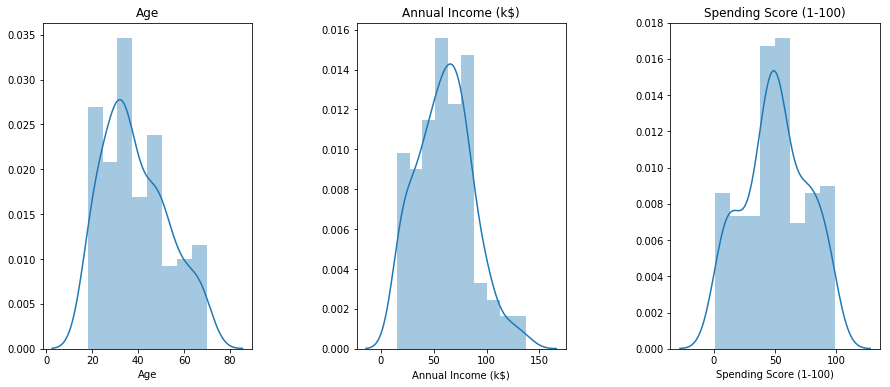

In [22]:
plt.figure(1 , figsize = (15 , 6))
n = 0 

#List of graphs
for x in ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x])
    plt.title('{}'.format(x))
plt.show()

From what we see here, our Age of shoppers is heavily concentrated in people from age 20 - 40, income from 20 - 70k, and a spending score of 50. The data itself, however, seems good to make some forecasts on. 

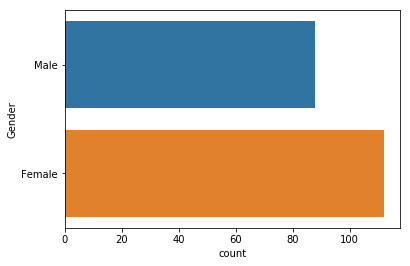

In [24]:
sns.countplot(y = 'Gender' , data = df)
plt.show()

Looks like our customers are slightly more female than male in this dataset

Let's see we can find the optimal number of clusters

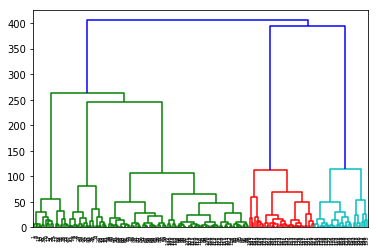

In [29]:
import scipy
from scipy.cluster import hierarchy
df_feature = df.iloc[:,3:5]
X = df_feature.values
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

5 Clusters is the optimal amount needed

In [33]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

kmeans_1 = KMeans(n_clusters = 5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

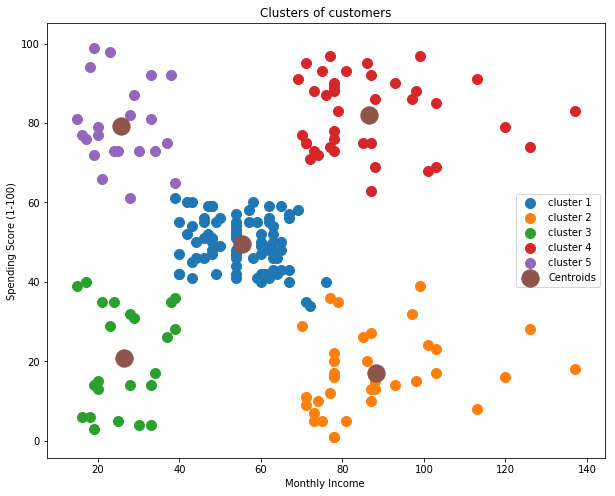

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 100, label = 'cluster 4')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s = 100, label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Visualizing the clusters in different ways

The cluster with high income and spending score can be called our target group. 

Low income and high spend is a group we can look at to either help, or find where they spend and work on avoiding those customers in those particular areas

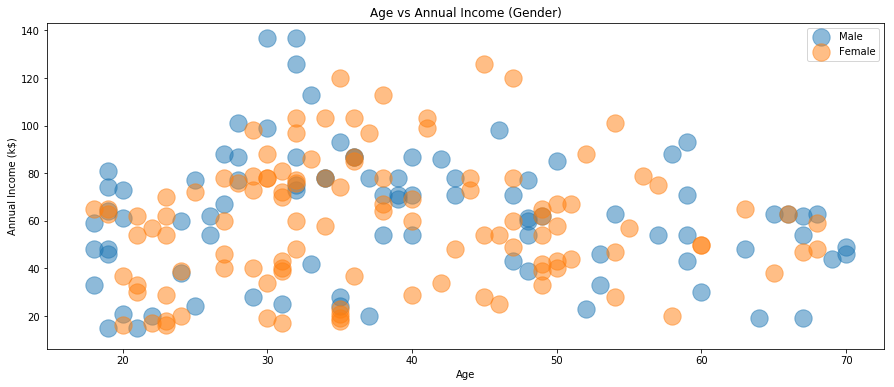

In [39]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 300,alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income (Gender)')
plt.legend()
plt.show()

In [41]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [42]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)